### Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading data

In [2]:
df = pd.read_csv(r"data\weather_by_city.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


# Grouping data by city

In [3]:
g = df.groupby('city')
g

![Splitting using groupby](groupby.png)

# Iterating through the groups

The `GroupBy` object iterator returns a tuple with the first value being the name of the group and the second being the DataFrame of that group

In [4]:
for city, city_df in g:
    print(city)
    print(city_df)

mumbai
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york
        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


# Getting data for one of the groups

In [5]:
g.get_group('paris')

,day,city,temperature,windspeed,event
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy
10,1/3/2017,paris,54,8,Cloudy
11,1/4/2017,paris,42,10,Cloudy


# Statistics by group

##### Maxiumum

In [6]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [7]:
g.min()

,day,temperature,windspeed,event
city,,,,
mumbai,1/1/2017,85,5,Fog
new york,1/1/2017,28,6,Rain
paris,1/1/2017,42,8,Cloudy


##### Arithmetic mean

In [8]:
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [9]:
g.std()

,temperature,windspeed
city,,
mumbai,3.109126,5.057997
new york,3.304038,2.708013
paris,5.315073,5.251984


##### 95th percentile

In [10]:
g.quantile(0.95)

0.95,temperature,windspeed
city,,
mumbai,91.70,14.55
new york,35.55,11.25
paris,53.40,18.95


##### Descriptive statistics

In [11]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

![Split Apply Combine](split_apply_combine.png)



# More info
There are is so much more we can do with grouped data. For more information visit: [Pandas Groupby documentation](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html)

# Iterating through data and plotting

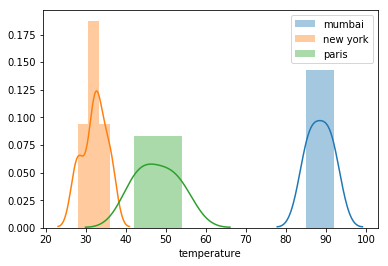

In [12]:
for name, data in g:
    sns.distplot(a=data['temperature'], label=name)
plt.legend()

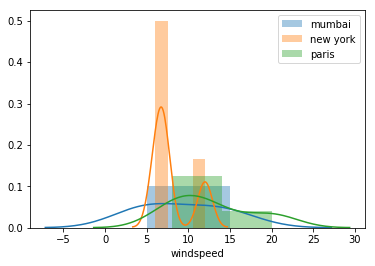

In [13]:
for name, data in g:
    sns.distplot(a=data['windspeed'], label=name)
plt.legend()